In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read the dataset to python environment

In [147]:
data=pd.read_csv('/content/Wholesale customers data.csv')

In [148]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [150]:
data.shape

(440, 8)

In [151]:
data.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [152]:
data['Channel'].nunique()

2

In [153]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [154]:
x=data[['Channel','Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']]

In [155]:
x.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


KMeans clustering

In [156]:
from sklearn.cluster import KMeans


In [157]:
wcss=[]
for i in range(1,11):
  km=KMeans(n_clusters=i,n_init=10,init = "k-means++")
  km.fit(x)
  css=km.inertia_
  wcss.append(css)

In [158]:
wcss

[157595857524.96133,
 113217528878.79834,
 80333727007.11429,
 64855545845.90139,
 52928149261.51565,
 47173566230.59978,
 41208189433.89694,
 35918636083.312416,
 32920802969.87062,
 30854933684.45868]

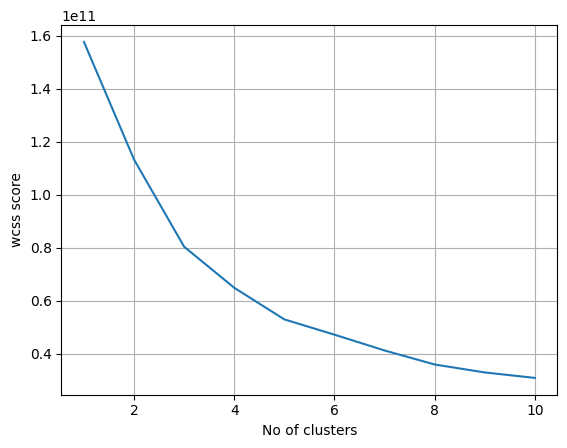

In [159]:
plt.plot(range(1,11),wcss)
plt.xlabel('No of clusters')
plt.ylabel('wcss score')
plt.grid()
plt.show()

In [160]:
km=KMeans(n_clusters=5,n_init=10,init = "k-means++")

In [161]:
km.fit(x)

KMeans(n_clusters=5, n_init=10)

In [162]:
cluster_labels=km.predict(x)

In [163]:
cluster_labels

array([4, 4, 4, 4, 1, 4, 4, 4, 4, 0, 0, 4, 1, 1, 1, 4, 0, 4, 1, 4, 1, 4,
       1, 3, 1, 1, 4, 1, 0, 2, 1, 4, 1, 1, 4, 4, 1, 0, 0, 2, 1, 1, 0, 0,
       4, 0, 0, 3, 4, 0, 4, 4, 2, 0, 1, 4, 0, 0, 4, 4, 4, 3, 4, 0, 4, 3,
       4, 1, 4, 4, 1, 1, 4, 1, 4, 1, 4, 0, 4, 4, 4, 0, 0, 1, 4, 3, 3, 2,
       4, 1, 4, 4, 3, 1, 0, 4, 4, 4, 4, 4, 0, 0, 4, 2, 1, 1, 0, 0, 4, 0,
       4, 0, 1, 1, 1, 4, 4, 4, 1, 4, 1, 4, 4, 4, 2, 2, 1, 1, 4, 2, 4, 4,
       1, 4, 4, 4, 4, 4, 4, 4, 1, 1, 2, 4, 1, 0, 4, 4, 4, 1, 1, 4, 1, 4,
       4, 0, 0, 1, 4, 0, 0, 4, 1, 0, 4, 0, 4, 4, 4, 4, 0, 0, 4, 0, 4, 0,
       2, 4, 4, 4, 4, 2, 0, 3, 4, 4, 4, 4, 0, 0, 1, 4, 4, 0, 4, 1, 1, 4,
       4, 4, 0, 0, 1, 4, 4, 0, 4, 4, 4, 0, 1, 3, 4, 4, 0, 0, 0, 1, 0, 4,
       1, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 1, 4, 1, 4, 4, 1, 4, 2, 1, 1,
       1, 4, 4, 0, 4, 4, 1, 4, 4, 0, 4, 1, 4, 1, 4, 4, 2, 2, 4, 4, 1, 4,
       0, 0, 0, 1, 0, 1, 4, 4, 4, 2, 4, 4, 1, 4, 4, 1, 4, 4, 2, 1, 2, 2,
       4, 1, 1, 2, 4, 4, 4, 0, 1, 4, 1, 4, 4, 4, 1,

In [164]:
pd.Series(cluster_labels).value_counts()

4    221
1    104
0     82
2     23
3     10
dtype: int64

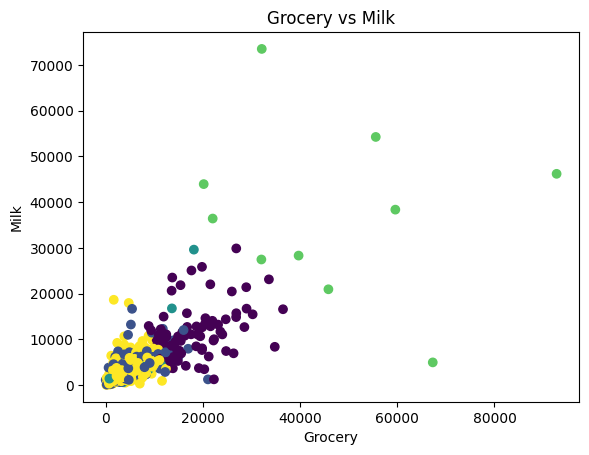

In [165]:
plt.scatter(x['Grocery'],x['Milk'],c=cluster_labels)
plt.xlabel('Grocery')
plt.ylabel('Milk')
plt.title('Grocery vs Milk')
plt.show()

In [166]:
cluster_indices=np.where(cluster_labels==0)

In [167]:
cluster_indices

(array([  9,  10,  16,  28,  37,  38,  42,  43,  45,  46,  49,  53,  56,
         57,  63,  77,  81,  82,  94, 100, 101, 106, 107, 109, 111, 145,
        155, 156, 159, 160, 163, 165, 170, 171, 173, 175, 182, 188, 189,
        193, 200, 201, 205, 209, 214, 215, 216, 218, 245, 251, 264, 265,
        266, 268, 293, 301, 303, 304, 305, 306, 309, 312, 315, 319, 331,
        341, 343, 346, 349, 351, 353, 357, 376, 384, 396, 407, 416, 418,
        420, 426, 430, 437]),)

In [168]:
data['cluster_labels']=cluster_labels

In [169]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster_labels
0,2,3,12669,9656,7561,214,2674,1338,4
1,2,3,7057,9810,9568,1762,3293,1776,4
2,2,3,6353,8808,7684,2405,3516,7844,4
3,1,3,13265,1196,4221,6404,507,1788,4
4,2,3,22615,5410,7198,3915,1777,5185,1


In [170]:
colors=['r','g','b','c','m']

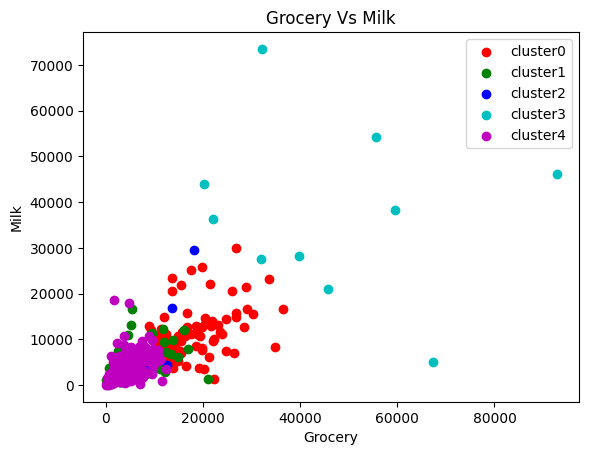

In [171]:
for i in range(max(cluster_labels)+1):
  cluster_data=data[cluster_labels==i]
  plt.scatter(cluster_data['Grocery'],cluster_data['Milk'],c=colors[i],label=f'cluster{i}')
  plt.xlabel('Grocery')
  plt.ylabel('Milk')
  plt.title('Grocery Vs Milk')
  plt.legend()

Agglomerative Hierarachical clustering

In [172]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

In [173]:
mergings=linkage(x,method='ward')

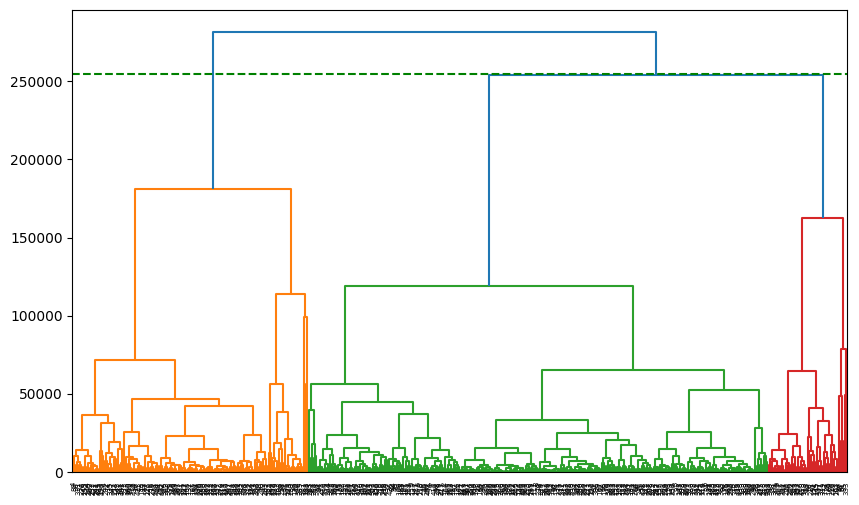

In [174]:
plt.figure(figsize=(10,6))
dendrogram(mergings)
plt.axhline(255000,color='green',linestyle='--')
plt.show()

In [175]:
cluster_labels_hc=fcluster(mergings,255000,criterion='distance')

silhouette score

In [176]:
from sklearn.metrics import silhouette_score
sil_score=silhouette_score(x,cluster_labels_hc)
sil_score

0.3447187623823024

In [177]:
sil_score=silhouette_score(x,cluster_labels)
sil_score

0.37056489907140544

DBSCAN clustering

PCA for dimensionality reduction

In [178]:
from sklearn.preprocessing import scale

In [179]:
x=pd.DataFrame(scale(data),index=data.index,columns=data.columns)

In [180]:
x

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster_labels
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,0.938841
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,0.938841
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,0.938841
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,0.938841
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,-0.841720
...,...,...,...,...,...,...,...,...,...
435,-0.690297,0.590668,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091,-0.841720
436,-0.690297,0.590668,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501,-0.248199
437,1.448652,0.590668,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456,-1.435240
438,-0.690297,0.590668,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046,0.938841


In [181]:
from sklearn.decomposition import PCA

In [182]:
pc=PCA(

)

In [183]:
pc_array=pc.fit_transform(x)

In [184]:
pc_array

array([[ 0.5347163 , -0.63599331, -0.45996742, ...,  1.41552371,
         0.50176713,  0.07120385],
       [ 0.7309824 , -0.62798153, -0.23722968, ...,  1.23104701,
         0.37682522,  0.12658325],
       [ 0.93190957,  0.50095743,  0.07754575, ...,  1.17370713,
        -0.32926906, -0.20640618],
       ...,
       [ 4.11682584, -0.53469148, -0.66150067, ..., -0.32958158,
        -0.54079617, -0.10352952],
       [-1.33868637, -0.11072215, -0.31434789, ..., -0.03606359,
        -0.16918888, -0.02092893],
       [-1.42843459, -0.93770358, -0.29575782, ..., -0.2396439 ,
         0.0301979 ,  0.02811602]])

In [185]:
pc_array.shape

(440, 9)

In [186]:
pc_array=pd.DataFrame(pc_array,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9'])

In [187]:
pc_array

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9
0,0.534716,-0.635993,-0.459967,0.803379,-0.015321,-0.391143,1.415524,0.501767,0.071204
1,0.730982,-0.627982,-0.237230,1.091535,0.206812,-0.056208,1.231047,0.376825,0.126583
2,0.931910,0.500957,0.077546,1.824304,1.362698,-0.962493,1.173707,-0.329269,-0.206406
3,-1.280967,0.566261,-0.198602,0.785776,-0.281169,0.391462,0.123094,-0.344313,0.075770
4,0.906716,1.037864,-0.974645,-0.281636,1.205367,-0.499171,0.980671,-0.225700,0.006829
...,...,...,...,...,...,...,...,...,...
435,0.524563,2.541171,-0.531644,-0.333415,-0.602545,1.018749,-0.485443,0.405649,0.836388
436,-1.081877,1.677966,-1.163670,-0.813392,-0.636570,-0.577852,0.327310,-0.272876,-0.222447
437,4.116826,-0.534691,-0.661501,-0.237200,-0.515942,0.032163,-0.329582,-0.540796,-0.103530
438,-1.338686,-0.110722,-0.314348,0.844900,-0.109801,-0.492487,-0.036064,-0.169189,-0.020929


In [188]:
pc.explained_variance_

array([3.33156209, 1.80548653, 1.02103014, 0.98079435, 0.62494965,
       0.55545756, 0.35842294, 0.28058702, 0.06221087])

In [189]:
pc.explained_variance_ratio_*100

array([36.93322615, 20.01536832, 11.31899569, 10.87294741,  6.92810342,
        6.15772399,  3.97342607,  3.11054808,  0.68966088])

In [190]:
pc1=PCA(n_components=7)

In [191]:
pc1_array=pc1.fit_transform(x)

In [192]:
pc_array=pd.DataFrame(pc_array,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7'])

In [193]:
pc_array

,pc1,pc2,pc3,pc4,pc5,pc6,pc7
0,0.534716,-0.635993,-0.459967,0.803379,-0.015321,-0.391143,1.415524
1,0.730982,-0.627982,-0.237230,1.091535,0.206812,-0.056208,1.231047
2,0.931910,0.500957,0.077546,1.824304,1.362698,-0.962493,1.173707
3,-1.280967,0.566261,-0.198602,0.785776,-0.281169,0.391462,0.123094
4,0.906716,1.037864,-0.974645,-0.281636,1.205367,-0.499171,0.980671
...,...,...,...,...,...,...,...
435,0.524563,2.541171,-0.531644,-0.333415,-0.602545,1.018749,-0.485443
436,-1.081877,1.677966,-1.163670,-0.813392,-0.636570,-0.577852,0.327310
437,4.116826,-0.534691,-0.661501,-0.237200,-0.515942,0.032163,-0.329582
438,-1.338686,-0.110722,-0.314348,0.844900,-0.109801,-0.492487,-0.036064


In [194]:
pc1.explained_variance_

array([3.33156209, 1.80548653, 1.02103014, 0.98079435, 0.62494965,
       0.55545756, 0.35842294])

In [195]:
pc1.explained_variance_ratio_*100

array([36.93322615, 20.01536832, 11.31899569, 10.87294741,  6.92810342,
        6.15772399,  3.97342607])

After PCA Kmeans clustering

In [220]:
x=pc_array[['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6',
       'pc7']]

In [221]:
wcss1=[]
for i in range(1,11):
  km1=KMeans(n_clusters=i,n_init=10,init = "k-means++")
  km1.fit(x)
  css1=km1.inertia_
  wcss1.append(css1)

In [222]:
wcss1

[3809.511725418224,
 2770.63974209712,
 2320.1379383494364,
 1931.2861711274336,
 1637.7305800013,
 1404.7360185286302,
 1241.9775718756075,
 1085.9619635608412,
 988.8150591993892,
 921.3053652281694]

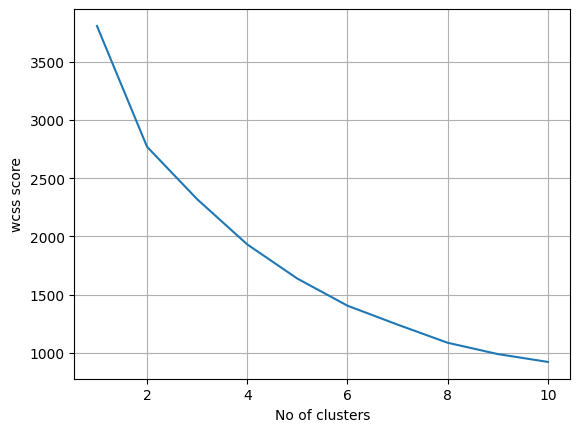

In [225]:
plt.plot(range(1,11),wcss1)
plt.xlabel('No of clusters')
plt.ylabel('wcss score')
plt.grid()
plt.show()

In [226]:
km1=KMeans(n_clusters=6,n_init=10,init = "k-means++")

In [227]:
km1.fit(x)

KMeans(n_clusters=6, n_init=10)

In [228]:
cluster_labels1=km1.predict(x)

In [229]:
cluster_labels1

array([0, 0, 0, 0, 5, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       5, 1, 1, 1, 0, 5, 1, 5, 5, 0, 5, 5, 0, 0, 5, 1, 1, 5, 5, 5, 1, 1,
       0, 1, 1, 2, 0, 1, 0, 0, 5, 1, 5, 0, 1, 1, 0, 0, 0, 2, 0, 1, 0, 2,
       0, 1, 0, 0, 5, 5, 0, 5, 0, 5, 0, 1, 0, 0, 0, 1, 1, 5, 0, 2, 2, 5,
       0, 5, 0, 0, 2, 5, 1, 0, 0, 0, 0, 0, 1, 1, 0, 5, 5, 5, 1, 1, 0, 1,
       0, 1, 5, 5, 5, 0, 0, 0, 5, 0, 5, 0, 0, 0, 5, 5, 5, 1, 0, 5, 0, 0,
       5, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 0, 5, 1, 0, 0, 0, 5, 5, 0, 5, 0,
       0, 1, 1, 5, 0, 1, 1, 0, 5, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       5, 0, 0, 0, 0, 5, 1, 4, 0, 0, 0, 0, 1, 1, 5, 0, 0, 1, 0, 5, 5, 3,
       3, 3, 1, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 2, 3, 3, 1, 3, 1, 3, 1, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 3, 3,
       3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 5, 5, 3, 3, 3, 3,
       1, 3, 1, 3, 1, 3, 3, 3, 3, 5, 0, 0, 5, 0, 0, 1, 0, 0, 5, 5, 5, 5,
       0, 5, 5, 5, 0, 0, 0, 1, 5, 0, 5, 0, 0, 0, 1,

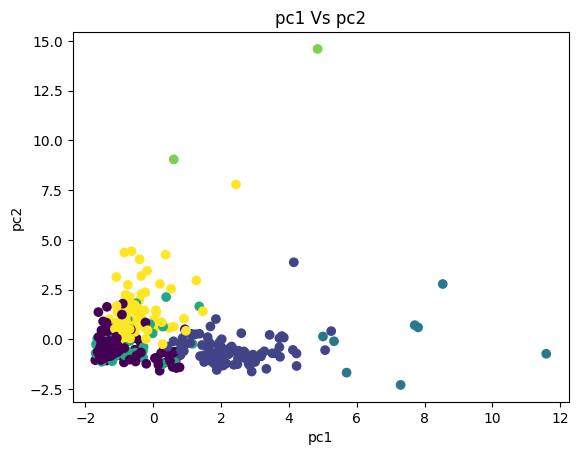

In [237]:
plt.scatter(x['pc1'],x['pc2'],c=cluster_labels1)
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.title('pc1 Vs pc2')
plt.show()

In [238]:
sil_score1=silhouette_score(x,cluster_labels1)
sil_score1

0.373382682837927